In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt

import seaborn as sns
import os
from keras.applications import VGG19
from os import listdir, makedirs
from os.path import join, exists, expanduser
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from numpy import newaxis
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Activation,Dropout,Flatten,BatchNormalization
import matplotlib.pyplot as plt
from glob import glob
from keras.applications import VGG19
from skimage.feature import local_binary_pattern
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.regularizers import l2
from keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import warnings
#warnings.filterwarnings("ignore")

#!pip install pillow==4.0.0
from PIL import Image

In [ ]:
from PIL import Image
import os

input_root = r"/content/drive/MyDrive/Car_Brand_Logos/Train"  # Thư mục gốc
output_root = r"/content/drive/MyDrive/Car_Brand_Logos/Resized_Train"  # Thư mục lưu ảnh resize

# Duyệt toàn bộ cây thư mục
for subdir, _, files in os.walk(input_root):
    output_subdir = subdir.replace(input_root, output_root)
    os.makedirs(output_subdir, exist_ok=True)

    for file in files:
        input_path = os.path.join(subdir, file)
        output_path = os.path.join(output_subdir, file)

        try:
            with Image.open(input_path) as img:
                img = img.convert("RGB")
                img.thumbnail((224, 224))  # Resize nhưng giữ nguyên tỷ lệ

                # Tạo nền trắng kích thước 224x224
                new_img = Image.new("RGB", (224, 224), (255, 255, 255))
                new_img.paste(img, ((224 - img.width) // 2, (224 - img.height) // 2))

                # Lưu ảnh đã resize
                new_img.save(output_path)

        except Exception as e:
            print(f"Lỗi xử lý ảnh {input_path}: {e}")

print("Hoàn tất resize ảnh")


In [ ]:
from PIL import Image
import os

input_root = r"/content/drive/MyDrive/Car_Brand_Logos/Test"  # Thư mục gốc
output_root = r"/content/drive/MyDrive/Car_Brand_Logos/Resized_Test"  # Thư mục lưu ảnh resize

# Duyệt toàn bộ cây thư mục
for subdir, _, files in os.walk(input_root):
    output_subdir = subdir.replace(input_root, output_root)
    os.makedirs(output_subdir, exist_ok=True)

    for file in files:
        input_path = os.path.join(subdir, file)
        output_path = os.path.join(output_subdir, file)

        try:
            with Image.open(input_path) as img:
                img = img.convert("RGB")
                img.thumbnail((224, 224))  # Resize nhưng giữ nguyên tỷ lệ

                # Tạo nền trắng kích thước 224x224
                new_img = Image.new("RGB", (224, 224), (255, 255, 255))
                new_img.paste(img, ((224 - img.width) // 2, (224 - img.height) // 2))

                # Lưu ảnh đã resize
                new_img.save(output_path)

        except Exception as e:
            print(f"Lỗi xử lý ảnh {input_path}: {e}")

print("Hoàn tất resize ảnh")


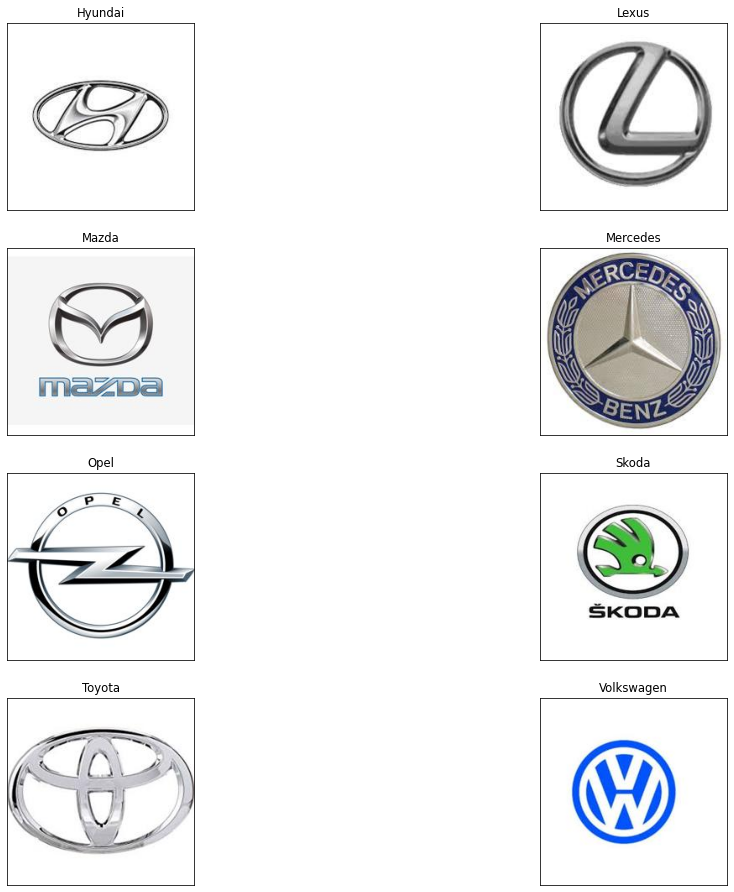

In [ ]:
# đường dẫn gốc
BASE_PATH = "/content/drive/MyDrive/Car_Brand_Logos/Resized_Train"

# Đọc ảnh với đường dẫn
hyundai_logo = cv2.imread(os.path.join(BASE_PATH, "hyundai", "images141.jpg"))
hyundai_logo = cv2.cvtColor(hyundai_logo, cv2.COLOR_BGR2RGB) if hyundai_logo is not None else None

lexus_logo  = cv2.imread(os.path.join(BASE_PATH, "lexus", "images103.jpg"))
lexus_logo = cv2.cvtColor(lexus_logo, cv2.COLOR_BGR2RGB) if lexus_logo is not None else None

mazda_logo = cv2.imread(os.path.join(BASE_PATH, "mazda", "0002.jpg"))
mazda_logo = cv2.cvtColor(mazda_logo, cv2.COLOR_BGR2RGB) if mazda_logo is not None else None

mercedes_logo = cv2.imread(os.path.join(BASE_PATH, "mercedes", "images12.jpg"))
mercedes_logo = cv2.cvtColor(mercedes_logo, cv2.COLOR_BGR2RGB) if mercedes_logo is not None else None

opel_logo = cv2.imread(os.path.join(BASE_PATH, "opel", "00000aaa1.jpg"))
opel_logo = cv2.cvtColor(opel_logo, cv2.COLOR_BGR2RGB) if opel_logo is not None else None

skoda_logo = cv2.imread(os.path.join(BASE_PATH, "skoda", "images156.jpg"))
skoda_logo = cv2.cvtColor(skoda_logo, cv2.COLOR_BGR2RGB) if skoda_logo is not None else None

toyota_logo = cv2.imread(os.path.join(BASE_PATH, "toyota", "images153.jpg"))
toyota_logo = cv2.cvtColor(toyota_logo, cv2.COLOR_BGR2RGB) if toyota_logo is not None else None

volkswagen_logo = cv2.imread(os.path.join(BASE_PATH, "volkswagen", "images137.jpg"))
volkswagen_logo = cv2.cvtColor(volkswagen_logo, cv2.COLOR_BGR2RGB) if volkswagen_logo is not None else None

# Danh sách tiêu đề và ảnh
titles = ["Hyundai", "Lexus", "Mazda", "Mercedes", "Opel", "Skoda", "Toyota", "Volkswagen"]
images = [hyundai_logo, lexus_logo, mazda_logo, mercedes_logo, opel_logo, skoda_logo, toyota_logo, volkswagen_logo]

# Vẽ ảnh
plt.figure(figsize=(18, 16), dpi=70)
for i in range(8):
    if images[i] is not None:  # Kiểm tra ảnh có tồn tại không
        plt.subplot(4, 2, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    else:
        print(f"Lỗi: Không thể đọc ảnh của {titles[i]}")

plt.show()


In [ ]:
print('shape:', volkswagen_logo.shape)
print('height:', volkswagen_logo.shape[0])
print('width: ', volkswagen_logo.shape[1])


shape: (224, 224, 3)
height: 224
width:  224


In [ ]:
#Averaging function
def Average(lst):
    return sum(lst) / len(lst)

path= "/content/drive/MyDrive/Car_Brand_Logos/Resized_Train"
listdir = os.listdir(path)
ratios_sub = []
ratios = []

for imdir in listdir:
    imlist = os.listdir(os.path.join(path, imdir))
    for im in imlist:
        im = cv2.imread(os.path.join(path,imdir,im))
        ratio = (im.shape[0] / im.shape[1]) #height/width ratio
        ratios_sub.append((ratio))
    ratios_sub_ave=Average(ratios_sub)
    ratios.append((ratios_sub_ave))
ratio_ave = Average(ratios)
print("Average ratio of width to height is {}".format(ratio_ave))

Average ratio of width to height is 1.0


In [ ]:
img_width, img_height = 224,224
train_data_dir = '/content/drive/MyDrive/Car_Brand_Logos/Resized_Train/'
validation_data_dir = r'/content/drive/MyDrive/Car_Brand_Logos/Resized_Test/'

numberOfClass=8
batch_size = 8
epochs=50

In [ ]:
# Data augmentation cho tập train
train_datagen = ImageDataGenerator(
    rotation_range=30,        # Xoay ngẫu nhiên 30 độ
    width_shift_range=0.2,    # Dịch ngang tối đa 20%
    height_shift_range=0.2,   # Dịch dọc tối đa 20%
    shear_range=0.2,          # Biến dạng hình ảnh
    zoom_range=0.2,           # Phóng to / thu nhỏ 20%
    horizontal_flip=True,     # Lật ngang ảnh
    brightness_range=[0.8, 1.2], # Điều chỉnh độ sáng từ 80% đến 120%
    rescale=1./255            # Chuẩn hóa giá trị pixel về [0,1]
)

# Chỉ chuẩn hóa ảnh cho tập validation (không augmentation)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load dữ liệu từ thư mục
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True  # Quan trọng khi training để tránh bias
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Giữ nguyên thứ tự trong validation
)


Found 2513 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=8192)]
        )
        print("GPU ready!")
    except RuntimeError as e:
        print(e)

GPU ready!


In [ ]:
img_height

224

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 46,244,424 (176.41 MB)

 Trainable params: 35,659,272 (136.03 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 71s 191ms/step - accuracy: 0.2809 - loss: 1.8927 - val_accuracy: 0.6450 - val_loss: 1.0344 - learning_rate: 1.0000e-04
Epoch 2/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 55s 176ms/step - accuracy: 0.7146 - loss: 0.8729 - val_accuracy: 0.8250 - val_loss: 0.7794 - learning_rate: 1.0000e-04
Epoch 3/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 54s 172ms/step - accuracy: 0.8441 - loss: 0.4849 - val_accuracy: 0.8025 - val_loss: 0.8668 - learning_rate: 1.0000e-04
Epoch 4/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 57s 182ms/step - accuracy: 0.8541 - loss: 0.4537 - val_accuracy: 0.8275 - val_loss: 0.6081 - learning_rate: 1.0000e-04
Epoch 5/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 54s 171ms/step - accuracy: 0.8837 - loss: 0.3869 - val_accuracy: 0.8150 - val_loss: 0.6113 - learning_rate: 1.0000e-04
Epoch 6/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 55s 175ms/step - accuracy: 0.8818 - loss: 0.3776 - val_accuracy: 0.8500 - val_loss: 0.5286 - learning_rate: 1.0000e-04
Epoch 7/50
315/315 ━━━━━━━━━━━━━━━━━━━━ 54s 17

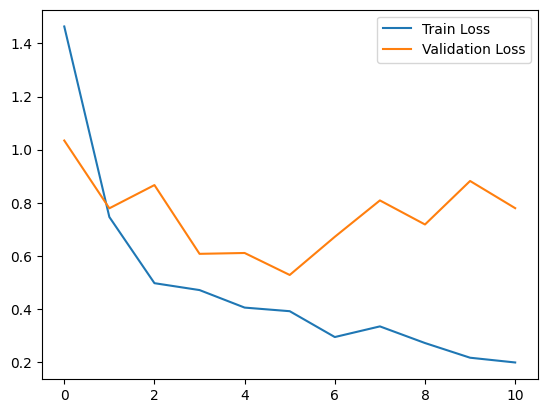

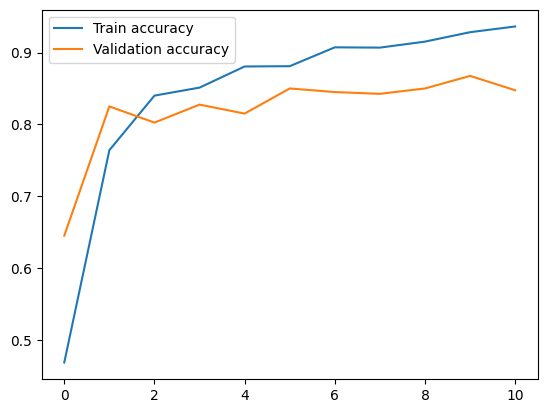

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
vgg = VGG19(include_top= False, weights = "imagenet", input_shape=( img_height,img_width, 3))
vgg_layer_list = vgg.layers

model = Sequential ()

for layer in vgg_layer_list:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False
# Mở khóa các layer cuối cùng của VGG19
for layer in model.layers[-5:]:
    layer.trainable = True

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(numberOfClass))
model.add(Activation('softmax'))
model.summary()

opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

hist = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)



# model plot

print(hist.history.keys())

plt.plot(hist.history["loss"], label ="Train Loss")
plt.plot(hist.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label ="Train accuracy")
plt.plot(hist.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()

In [ ]:
def save_model(model, model_path="car_brand_model_final_01.h5"):
    model.save(model_path)
    print(f"Model saved to {model_path}")

# Lưu model
save_model(model)

Model saved to car_brand_model_final_01.h5


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras.models import load_model

def load_trained_model(model_path="/content/car_brand_model_final_01.h5"):
    return load_model(model_path)

def preprocess_image(image_path, target_size=(224, 224)):  # Đổi target_size thành 224x224
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"File not found: {image_path}")

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not read the image. Check if the file is valid: {image_path}")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image.astype("float32") / 255.0  # Chuẩn hóa ảnh về [0,1]
    image = np.expand_dims(image, axis=0)  # Thêm batch dimension
    return image


def predict_image(model, image_path, class_labels):
    image = preprocess_image(image_path)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    print(f"Predicted Class: {class_labels[predicted_class]} with confidence {confidence:.2f}")
    return class_labels[predicted_class], confidence



# Load model đã lưu
loaded_model = load_trained_model()

# Danh sách nhãn lớp (cập nhật đúng theo dataset)
class_labels = ["Hyundai", "Lexus", "Mazda", "Mercedes", "Opel", "Skoda", "Toyota", "Volkswagen"]


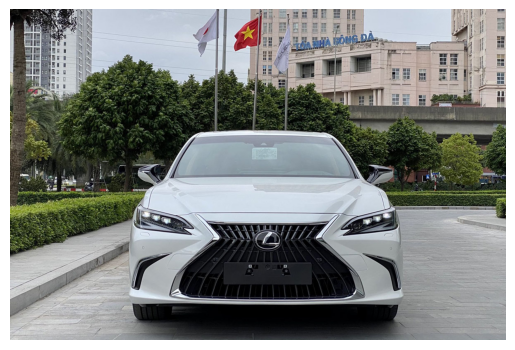

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Predicted Class: Lexus with confidence 0.91


('Lexus', np.float32(0.9084305))

In [ ]:
# Dự đoán ảnh mới
image_path = "/content/Lexus-ES-250-NEW-28.jpg"  # Thay bằng đường dẫn ảnh thực tế
# Đọc ảnh với OpenCV (BGR -> RGB để hiển thị đúng màu)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh
plt.imshow(image)
plt.axis("off")  # Ẩn trục tọa độ
plt.show()
predict_image(loaded_model, image_path, class_labels)